**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [50]:
# Create an array of line values with x: 0 -> 4
# Use an arbitrary slope of -0.8 
num_values = 10
slope = -0.8
x = np.arange(num_values)
y = line(slope, x, errors=errors)  # Intercept of 0 is the default
errs = np.sqrt(x)

Text(0,0.5,'Endogenous')

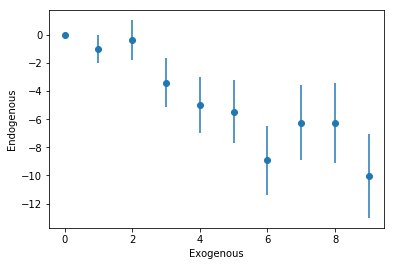

In [64]:
pl.errorbar(x, y, errs, fmt="o")  # Set fmt paramter to use points instead of lines
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [52]:
print(y)
print(x)
sm.add_constant(x)

[  0.          -0.98023436  -0.3767501   -3.39626378  -4.98844224
  -5.46851893  -8.93277126  -6.23883271  -6.26338036 -10.02156163]
[0 1 2 3 4 5 6 7 8 9]


array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [69]:
#THE WRONG WAY
smfit_wrong = sm.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     166.2
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.18e-07
Time:                        22:33:40   Log-Likelihood:                -16.766
No. Observations:                  10   AIC:                             35.53
Df Residuals:                       9   BIC:                             35.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -1.0414      0.081    -12.890      0.000        -1.224    -0.859
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.143
Skew:                          -0.288   Prob(JB):                        0.931
Kurtosis:                       2.891   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#THE RIGHT WAY
smfit_right = sm.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.66
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000168
Time:                        22:33:45   Log-Likelihood:                -16.762
No. Observations:                  10   AIC:                             37.52
Df Residuals:                       8   BIC:                             38.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0672      0.850      0.079      0.939        -1.893     2.027
x1            -1.0520      0.159     -6.608      0.000        -1.419    -0.685
==============================================================================
Omnibus:                        0.752   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.113
Skew:                          -0.254   Prob(JB):                        0.945
Kurtosis:                       2.882   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

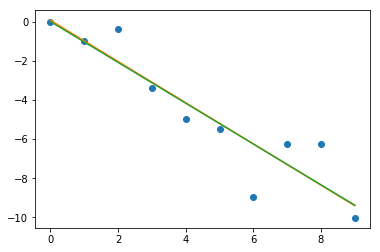

In [76]:
pl.plot(x, y, "o")
b_right, a_right = smfit_right.params
pl.plot(x, a_right * x + b_right)
a_wrong = smfit_wrong.params  # The wrong one returns only one parameter value
pl.plot(x, a_wrong * x)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [116]:
num_values = 10
slope = -0.8
intercept = 123 * slope
x = np.arange(num_values)
y = line(slope, x, b=intercept, errors=errors)  # Intercept of 0 is the default
errs = np.sqrt(x)

Text(0,0.5,'Endogenous')

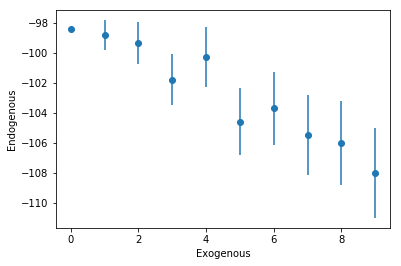

In [117]:
pl.errorbar(x, y, errs, fmt="o")  # Set fmt paramter to use points instead of lines
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")

# 6. repeat step 3

In [118]:
#THE WRONG WAY
smfit_wrong = sm.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     25.28
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000711
Time:                        22:53:28   Log-Likelihood:                -53.820
No. Observations:                  10   AIC:                             109.6
Df Residuals:                       9   BIC:                             109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -16.5193      3.285     -5.028      0.001       -23.951    -9.087
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.620
Skew:                          -0.012   Prob(JB):                        0.734
Kurtosis:                       1.781   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#THE RIGHT WAY
smfit_right = sm.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     102.0
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.87e-06
Time:                        22:53:30   Log-Likelihood:                -12.776
No. Observations:                  10   AIC:                             29.55
Df Residuals:                       8   BIC:                             30.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -97.7853      0.571   -171.395      0.000       -99.101   -96.470
x1            -1.0795      0.107    -10.101      0.000        -1.326    -0.833
==============================================================================
Omnibus:                        1.241   Durbin-Watson:                   3.406
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.351
Skew:                           0.457   Prob(JB):                        0.839
Kurtosis:                       2.904   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [140]:
errs = errors(x)
errs_inv = 1/errs  # Take the inverse of the errs array for the weights array
print(errs)
errs_inv

[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.        ]


array([        inf,  1.        ,  0.70710678,  0.57735027,  0.5       ,
        0.4472136 ,  0.40824829,  0.37796447,  0.35355339,  0.33333333])

In [141]:


smfit = sm.WLS(y, sm.add_constant(x), errors=errs_inv).fit()
smfit.summary()
#pl.plot(x, y, "o")
#pl.plot(x, smfit.params * x)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            WLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     102.0
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.87e-06
Time:                        23:01:35   Log-Likelihood:                -12.776
No. Observations:                  10   AIC:                             29.55
Df Residuals:                       8   BIC:                             30.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -97.7853      0.571   -171.395      0.000       -99.101   -96.470
x1            -1.0795      0.107    -10.101      0.000        -1.326    -0.833
==============================================================================
Omnibus:                        1.241   Durbin-Watson:                   3.406
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.351
Skew:                           0.457   Prob(JB):                        0.839
Kurtosis:                       2.904   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

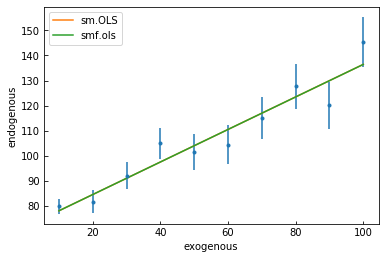

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();